In [1]:
%matplotlib nbagg

In [2]:
import hyperspy.api as hs
import EELS.EELS as eels
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [3]:
lattice = [[ 3.2871687359128612, 0.0000000000000000, 0.0000000000000000],
                    [-1.6435843679564306, 2.8467716318265182, 0.0000000000000000],
                    [ 0.0000000000000000, 0.0000000000000000, 5.3045771064003047]]

positions = [[0.3333333333333357,  0.6666666666666643,  0.9996814330926364],
             [0.6666666666666643,  0.3333333333333357,  0.4996814330926362],
             [0.3333333333333357,  0.6666666666666643,  0.3787615522102606],
             [0.6666666666666643,  0.3333333333333357,  0.8787615522102604]]

numbers = [30, 30, 8, 8]

atoms = []
for i, position in enumerate(positions):
    atoms.append(eels.Atom(numbers[i],position))
atoms

In [4]:
cell = eels.Cell(lattice = lattice,
                atoms=atoms)
cell

Lattice parameters:
[[3.287168735912861, 0.0, 0.0], [-1.6435843679564306, 2.846771631826518, 0.0], [0.0, 0.0, 5.304577106400305]]
Relatice atom positions:
 [[ 0.33  0.67  1.  ]
 [ 0.67  0.33  0.5 ]
 [ 0.33  0.67  0.38]
 [ 0.67  0.33  0.88]]

In [5]:
model = eels.ModelSystem(cell=cell)


model.meshgrid(pointDensity=np.array([21, 21, 21]))

model.addParabolicBand(energy_offset=0.0, effective_mass=np.array([-2, -2, -2]), k_center=np.array([0, 0, 0]))
model.addParabolicBand(energy_offset=3.3, effective_mass=np.array([ 0.38, 0.38, 0.38]), k_center=np.array([0, 0, 0]))

energyBins = np.linspace(2.8,6,60)

print(model.diffractionGrid()[1])

print(model.cell.brillouinZone)
model.spaceGroup()

[23 25 15]
[[ 1.91142768  1.10356328 -0.        ]
 [ 0.          2.20712657  0.        ]
 [ 0.         -0.          1.18448374]]


'P6_3mc (186)'

In [6]:
k = model.reciprocalGrid()[0]
k

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.025,  0.   ,  0.   ],
       [ 0.05 ,  0.   ,  0.   ],
       ..., 
       [-0.075,  0.5  ,  0.5  ],
       [-0.05 ,  0.5  ,  0.5  ],
       [-0.025,  0.5  ,  0.5  ]])

In [7]:
s = model.calculateScatteringCrossSection(energyBins, fermiEnergy=1.65, temperature=0)

s.metadata['General']['authors'] = "Sindre R. Bilden"
s.metadata['General']['name'] = "Reference"
s.metadata['General']['notes'] = "ZnO model"
s.metadata['General']['title'] = "Reference"


CCD:
[ 1.91142768  2.20712657  1.18448374] [23 25 15]


<IPython.core.display.Javascript object>


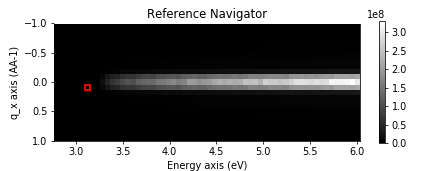

<IPython.core.display.Javascript object>


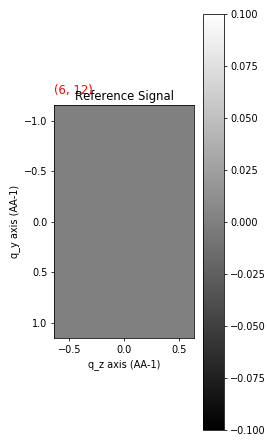

In [10]:
s.as_signal2D((0,1)).plot()